In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy import func, text, and_

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

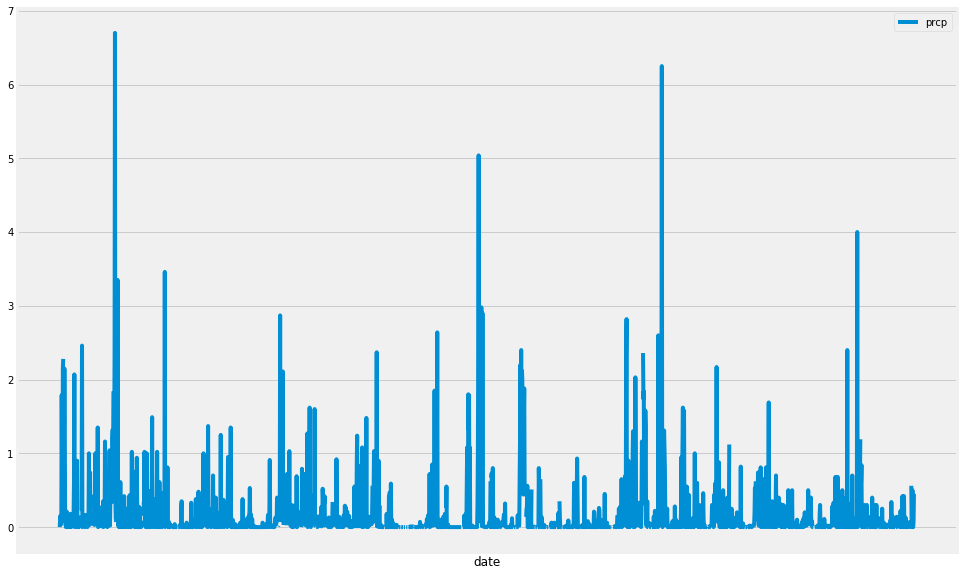

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results



# Calculate the date 1 year ago from the last data point in the database

session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Perform a query to retrieve the data and precipitation scores
scores= session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-22').\
                    order_by(Measurement.date).all()
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(scores, \
                  columns=['date', 'prcp'])
df.set_index('date', inplace=True)
df.sort_values(by=['date'])

df.plot(figsize=(15,10))

plt.xticks([])

#plt.tight_layout()
plt.show()



![precipitation](Images/precipitation.png)

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [13]:
# Design a query to show how many stations are available in this dataset?
Numberof_station=session.query(func.count(Measurement.station)).all()

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
highest_station= session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
scores

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
max_numbers= session.query(Measurement.station,func.max(Measurement.tobs).label("Max_temp"),func.min(Measurement.tobs).label("Min_temp"),func.avg(Measurement.tobs).label("Avg_temp"))\
                        .group_by(Measurement.station).\
                        order_by(func.max(Measurement.tobs).desc()).all()


max_numbers
#order_by(Measurement.tobs)

[('USC00511918', 87.0, 53.0, 71.61596766043456),
 ('USC00517948', 87.0, 58.0, 74.68440233236151),
 ('USC00519397', 87.0, 56.0, 74.55323054331865),
 ('USC00513117', 85.0, 59.0, 72.68918420081211),
 ('USC00514830', 85.0, 58.0, 74.8732970027248),
 ('USC00519281', 85.0, 54.0, 71.66378066378067),
 ('USC00519523', 85.0, 56.0, 74.5436493068565),
 ('USC00516128', 84.0, 58.0, 70.91500765696784),
 ('USC00518838', 83.0, 58.0, 72.72407045009784)]

In [16]:
session.query(Measurement.date).filter(Measurement.station=="USC00519281").order_by(Measurement.date.desc()).first()

('2017-08-18')

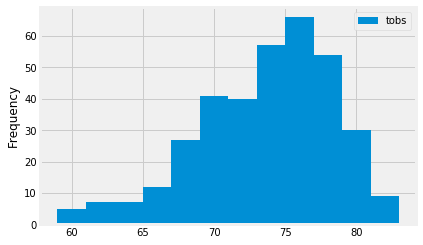

In [17]:
# Choose the station with the highest number of temperature observations.
y=session.query(Measurement.station,func.max(Measurement.tobs)).all()

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps= session.query( Measurement.date, Measurement.tobs).filter(Measurement.station=="USC00519281", Measurement.date > '2016-08-19').\
                    order_by(Measurement.date).all()

df = pd.DataFrame(temps, \
                  columns=['date', 'tobs'])
df.set_index('date', inplace=True)
df.sort_values(by=['date'])

#bins= 12
#df.plot(figsize=(20,10))
df.plot.hist(bins= 12)
#plt.xticks([])

#plt.tight_layout()
plt.show()


![precipitation](Images/station-histogram.png)

# REQUIRED: Step 2 - Climate App

In [18]:
from flask import Flask, jsonify

In [19]:
# Flask Setup
app = Flask(__name__)

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= '2012-02-28').filter(Measurement.date <= '2012-03-05').all()

# function usage example
#print(calc_temps('2012-02-28', '2012-03-05'))

In [52]:
Trip_avg_temp=session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= '2015-05-11').filter(Measurement.date <= '2015-05-31').all()

Trip_avg_temps = list(np.ravel(Trip_avg_temp))
Trip_avg_temps

[64.0, 72.70344827586207, 82.0]

ValueError: In safezip, len(args[0])=3 but len(args[1])=1

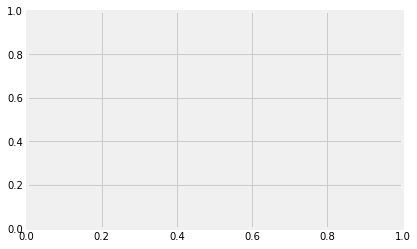

In [53]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

start_date = dt.datetime(2015, 5, 11)
#end_date = dt.datetime(2015, 5, 31)

result = session.query(func.max(Measurement.tobs) - func.min(Measurement.tobs)).\
     filter(Measurement.date >= start_date).all()
    
ptps = list(np.ravel(result))

# List Comprehension Solution
# ptps = [result[0] for result in results]
ptps

x= Trip_avg_temps
y=range(len(Trip_avg_temps))
fig, ax = plt.subplots()

ax.bar(x, y, yerr=ptps)
ax.set_title('Trip Avg Temp')
fig.tight_layout()
plt.show()


In [21]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

import datetime as dt
import numpy as np

date = dt.datetime(2011, 5, 31)

results = session.query(Dow.high_price - Dow.low_price).\
    filter(Dow.date > date).filter(Dow.stock == 'IBM').all()
    
ptps = list(np.ravel(results))

# List Comprehension Solution
# ptps = [result[0] for result in results]

ptps

## Optional Challenge Assignment

In [22]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [23]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [24]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [25]:
# Plot the daily normals as an area plot with `stacked=False`
